- 1 - Teste diferentes regressores CV com a base house_prices
    - Aumente a complexidade da hipótese permitindo uma [regressão polinomial](https://acervolima.com/python-implementacao-de-regressao-polinomial/), [regressão polinomial link 02](https://matheusfacure.github.io/2017/02/26/regr-poli/), e deixe o CV decidir uma boa regularização!
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/renadeveloper/course_betech_machine_learning_I_activities

Cloning into 'course_betech_machine_learning_I_activities'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 891.91 KiB | 2.63 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
house_prices = pd.read_csv("./course_betech_machine_learning_I_activities/house_prices.csv")

In [4]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
house_prices.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [6]:
house_prices.shape

(2919, 81)

In [7]:
selecao = house_prices.SalePrice.isnull()
house_prices = house_prices[~selecao]

In [8]:
house_prices.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
colunas_nulas = house_prices.columns[house_prices.isnull().any()]
dados_nulos = house_prices[colunas_nulas].isnull().sum()
dados_nulos

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Existem colunas que estão com mais da metade dos dados em falta e irei excluílos
house_prices.drop(columns = ['Alley', 'PoolQC','Fence', 'MiscFeature'],inplace=True)

<ipython-input-10-554d06e852d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices.drop(columns = ['Alley', 'PoolQC','Fence', 'MiscFeature'],inplace=True)


In [11]:
colunas_nulas = house_prices.columns[house_prices.isnull().any()]
dados_nulos = house_prices[colunas_nulas].isnull().sum()
dados_nulos

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [12]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
import numpy as np

numerical_data = house_prices.select_dtypes(np.number).columns
house_prices[numerical_data]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,40,0,0,0,0,0,8,2007,175000.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,349,0,0,0,0,0,0,2,2010,210000.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,60,0,0,0,0,2500,5,2010,266500.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,366,0,112,0,0,0,0,4,2010,142125.0


In [14]:
house_prices = house_prices[['OverallQual','OverallCond','MSSubClass','LotFrontage','LotArea','YearBuilt','YrSold','SalePrice']]
house_prices

,OverallQual,OverallCond,MSSubClass,LotFrontage,LotArea,YearBuilt,YrSold,SalePrice
0,7,5,60,65.0,8450,2003,2008,208500.0
1,6,8,20,80.0,9600,1976,2007,181500.0
2,7,5,60,68.0,11250,2001,2008,223500.0
3,7,5,70,60.0,9550,1915,2006,140000.0
4,8,5,60,84.0,14260,2000,2008,250000.0
...,...,...,...,...,...,...,...,...
1455,6,5,60,62.0,7917,1999,2007,175000.0
1456,6,6,20,85.0,13175,1978,2010,210000.0
1457,7,9,70,66.0,9042,1941,2010,266500.0
1458,5,6,20,68.0,9717,1950,2010,142125.0


<Axes: >

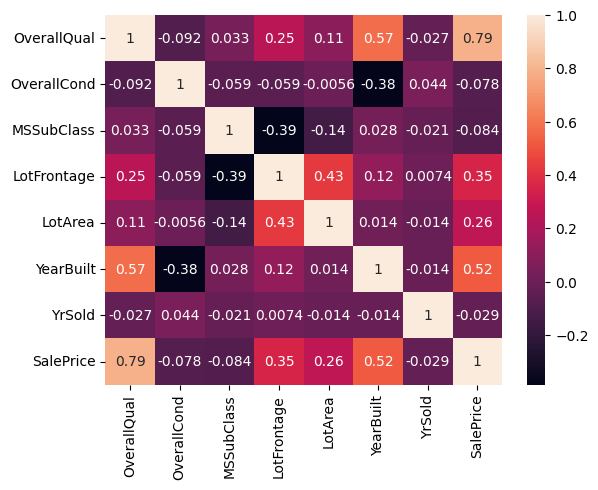

In [15]:
# Heatmap
sns.heatmap(house_prices.corr(), annot=True)

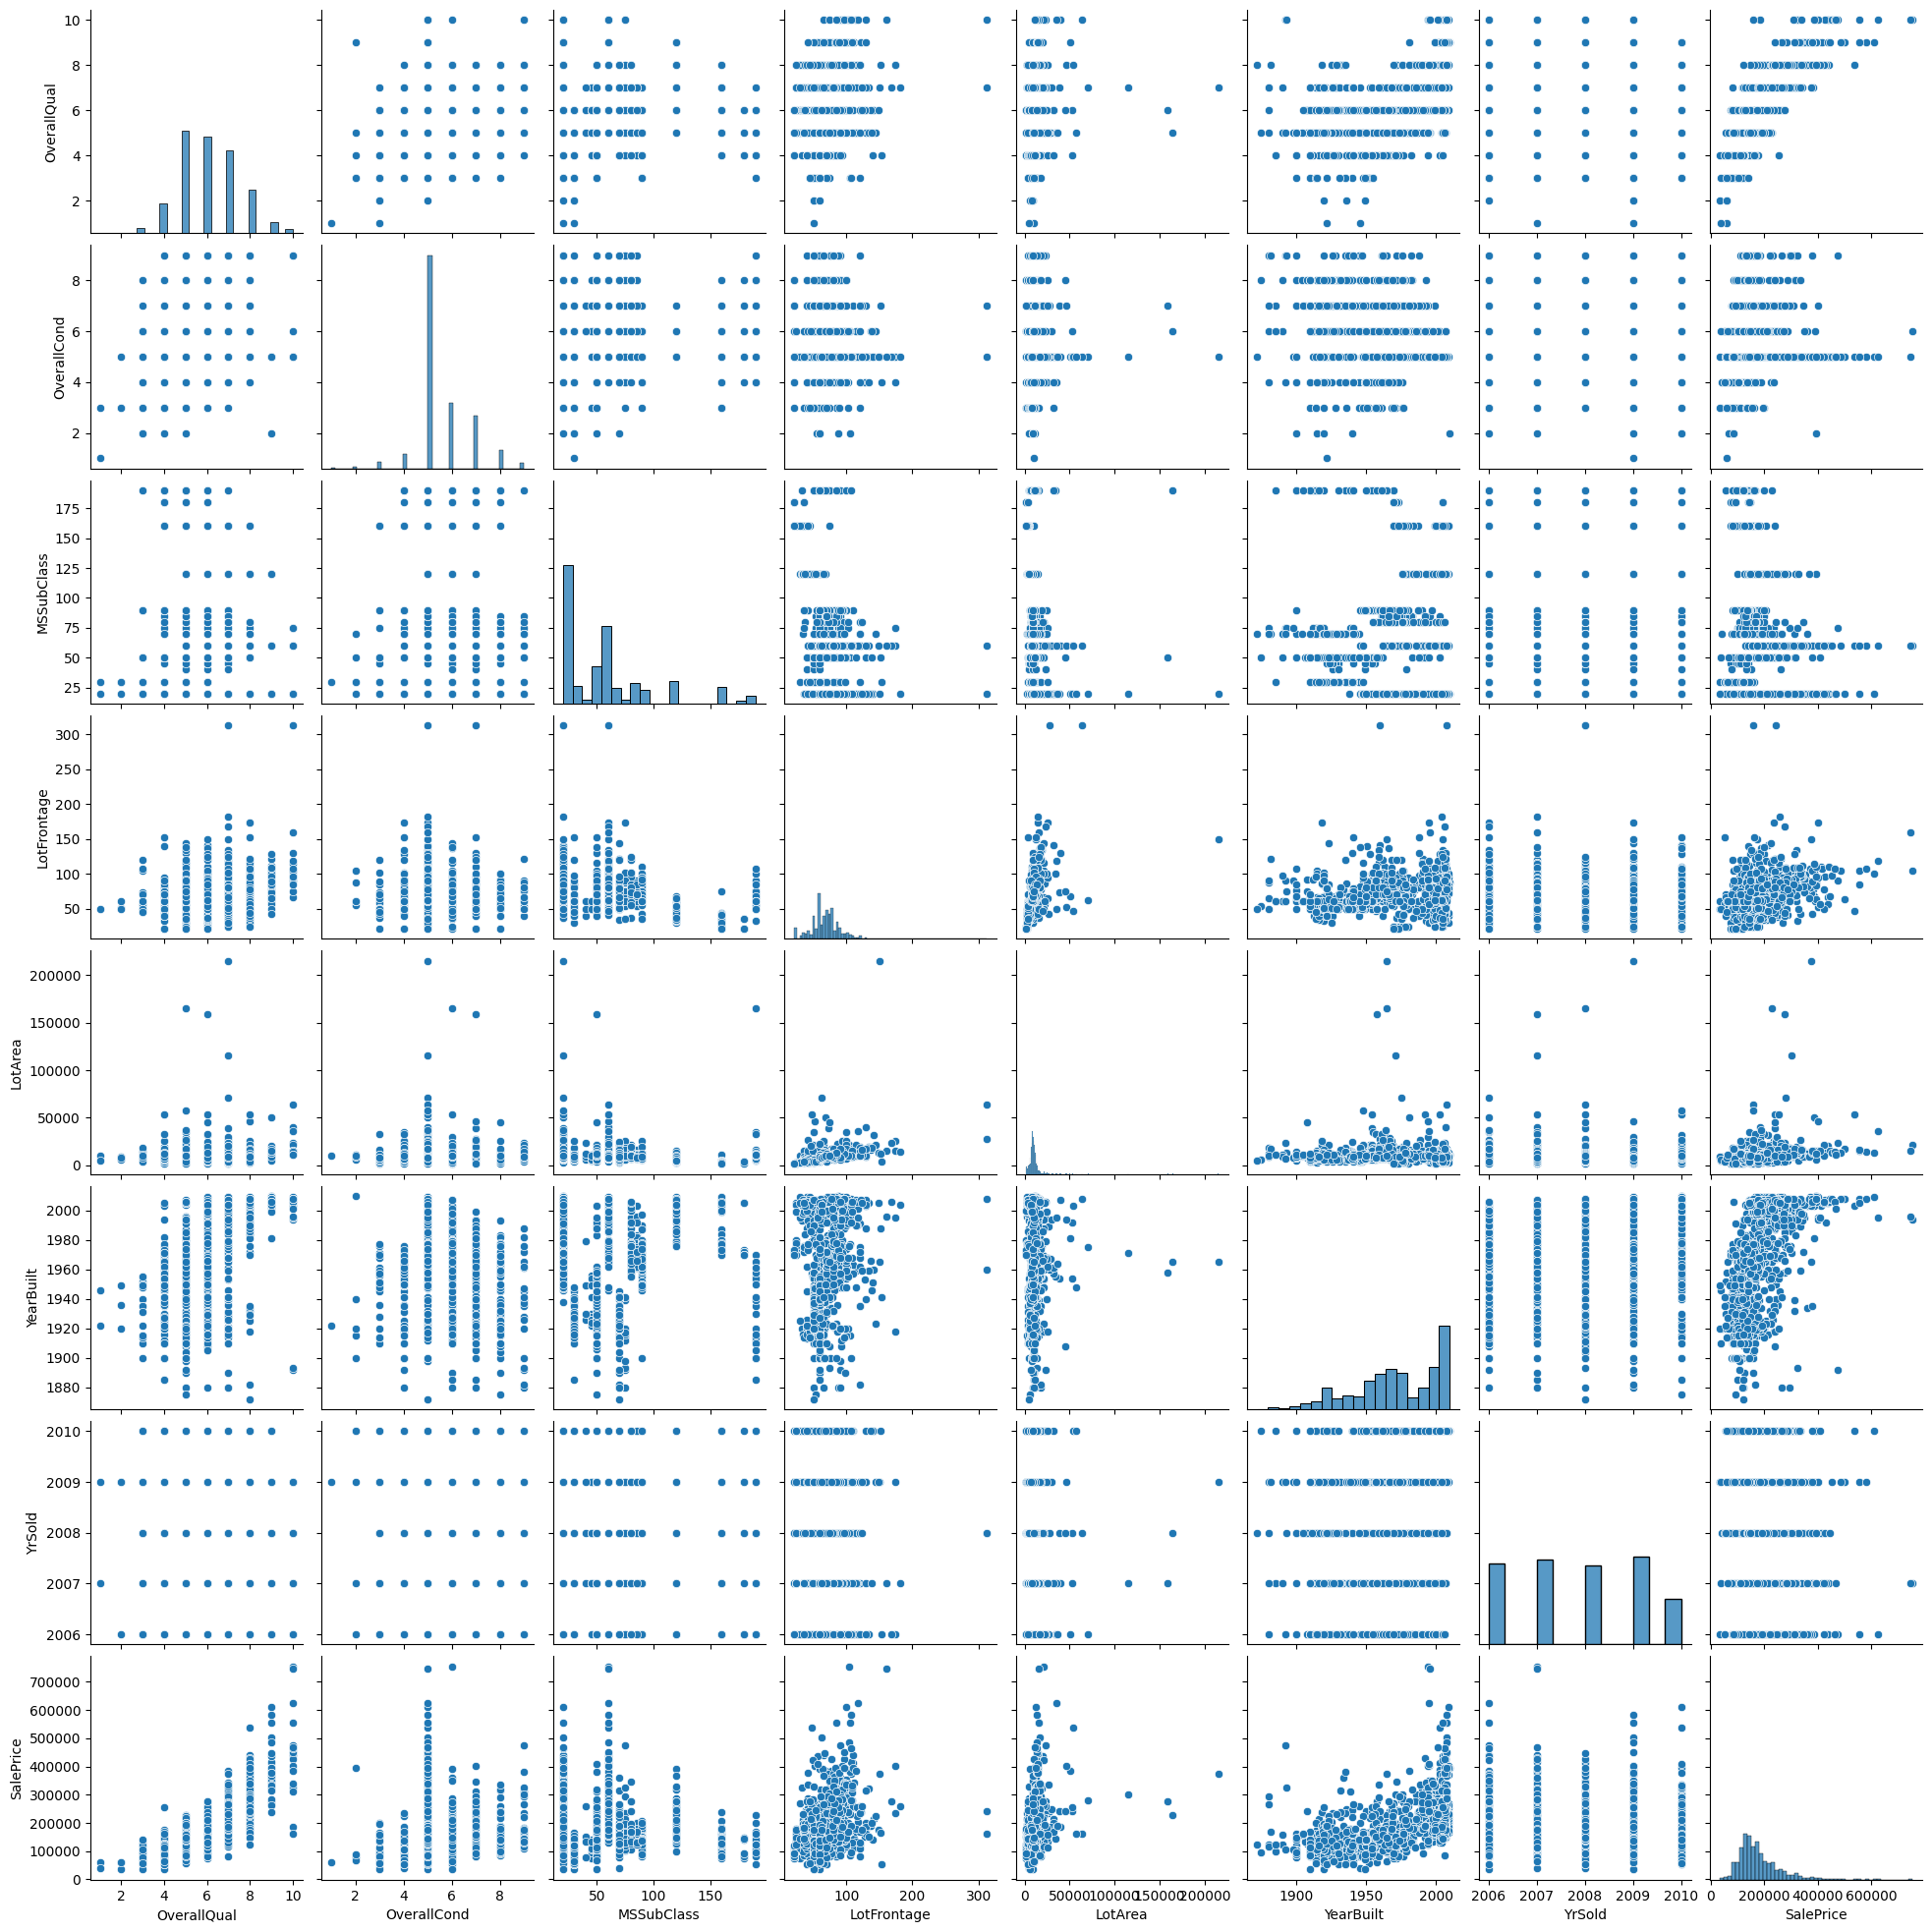

In [16]:
# Pairplot
sns.pairplot(house_prices)

In [17]:
# Describe
house_prices.describe()

,OverallQual,OverallCond,MSSubClass,LotFrontage,LotArea,YearBuilt,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,56.897260,70.049958,10516.828082,1971.267808,2007.815753,180921.195890
std,1.382997,1.112799,42.300571,24.284752,9981.264932,30.202904,1.328095,79442.502883
min,1.000000,1.000000,20.000000,21.000000,1300.000000,1872.000000,2006.000000,34900.000000
25%,5.000000,5.000000,20.000000,59.000000,7553.500000,1954.000000,2007.000000,129975.000000
50%,6.000000,5.000000,50.000000,69.000000,9478.500000,1973.000000,2008.000000,163000.000000
75%,7.000000,6.000000,70.000000,80.000000,11601.500000,2000.000000,2009.000000,214000.000000
max,10.000000,9.000000,190.000000,313.000000,215245.000000,2010.000000,2010.000000,755000.000000


In [18]:
house_prices.isnull().sum()

OverallQual      0
OverallCond      0
MSSubClass       0
LotFrontage    259
LotArea          0
YearBuilt        0
YrSold           0
SalePrice        0
dtype: int64

In [19]:
house_prices.dropna(inplace=True)

In [20]:
house_prices.isnull().sum()

OverallQual    0
OverallCond    0
MSSubClass     0
LotFrontage    0
LotArea        0
YearBuilt      0
YrSold         0
SalePrice      0
dtype: int64

In [21]:
X = house_prices[['OverallQual','LotFrontage','LotArea','YearBuilt']]
y = house_prices['SalePrice']

Os dados não têm variação de escala tão grande.



In [22]:
# Import Kfold
from sklearn.model_selection import KFold

In [23]:
# Instaciando a classe
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
# Variaveis
vars(kf)

{'n_splits': 5, 'shuffle': True, 'random_state': 42}

In [25]:
# qtos splists ha?
len(list(kf.split(X)))

5

In [26]:
# em cada split, temos uma tupla ([indices de treino], [indices de validação])
# como visto acima, isso é feito pra cada split
# o que temos abaixo é apenas o primeiro split (indice 0)
len(list(kf.split(X))[0][0])

960

In [27]:
# criando indices de treino e validacao
idx_treino, idx_val = list(kf.split(X))[0]

In [28]:
# Val
idx_val

array([  10,   23,   31,   43,   44,   49,   51,   54,   56,   58,   59,
         63,   70,   78,   81,   83,   86,   88,   96,  101,  107,  109,
        113,  123,  128,  129,  135,  140,  155,  156,  158,  163,  168,
        170,  174,  178,  184,  192,  196,  198,  199,  208,  209,  210,
        218,  220,  231,  233,  240,  243,  244,  247,  260,  265,  266,
        270,  277,  286,  289,  292,  294,  296,  298,  306,  308,  310,
        314,  319,  327,  328,  331,  332,  333,  342,  344,  350,  352,
        355,  358,  362,  363,  367,  371,  376,  377,  380,  381,  382,
        390,  394,  398,  405,  409,  411,  422,  423,  425,  428,  429,
        433,  435,  439,  447,  453,  461,  471,  479,  481,  482,  486,
        490,  494,  513,  514,  519,  523,  527,  532,  534,  535,  536,
        541,  542,  543,  545,  560,  561,  566,  572,  573,  575,  578,
        582,  584,  588,  589,  594,  598,  599,  605,  613,  617,  622,
        628,  629,  643,  665,  666,  679,  688,  6

In [29]:
# Treino
idx_treino

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         24,   25,   26,   27,   28,   29,   30,   32,   33,   34,   35,
         36,   37,   38,   39,   40,   41,   42,   45,   46,   47,   48,
         50,   52,   53,   55,   57,   60,   61,   62,   64,   65,   66,
         67,   68,   69,   71,   72,   73,   74,   75,   76,   77,   79,
         80,   82,   84,   85,   87,   89,   90,   91,   92,   93,   94,
         95,   97,   98,   99,  100,  102,  103,  104,  105,  106,  108,
        110,  111,  112,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  124,  125,  126,  127,  130,  131,  132,  133,  134,  136,
        137,  138,  139,  141,  142,  143,  144,  145,  146,  147,  148,
        149,  150,  151,  152,  153,  154,  157,  159,  160,  161,  162,
        164,  165,  166,  167,  169,  171,  172,  173,  175,  176,  177,
        179,  180,  181,  182,  183,  185,  186,  1

In [30]:
# Import Cv
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [31]:
# Instanciar kfold elasticNet como nosso modelo
lr = LinearRegression()
kf5= KFold(n_splits=5,shuffle=True, random_state=42)
result_cv = cross_validate(
                            estimator = lr, X=X, y=y, cv=kf5,
                            scoring= "r2",
                            return_train_score=True
                            )

In [32]:
result_cv

{'fit_time': array([0.03665924, 0.002913  , 0.00278568, 0.00467157, 0.00286674]),
 'score_time': array([0.00221443, 0.00171924, 0.00147629, 0.00228119, 0.00146079]),
 'test_score': array([0.68595893, 0.67190216, 0.73146214, 0.48307148, 0.69024104]),
 'train_score': array([0.67884279, 0.69435199, 0.68060552, 0.71580706, 0.68945126])}

In [33]:
df_result_cv = pd.DataFrame(result_cv)
df_result_cv= df_result_cv.abs()
df_result_cv

,fit_time,score_time,test_score,train_score
0,0.036659,0.002214,0.685959,0.678843
1,0.002913,0.001719,0.671902,0.694352
2,0.002786,0.001476,0.731462,0.680606
3,0.004672,0.002281,0.483071,0.715807
4,0.002867,0.001461,0.690241,0.689451


In [34]:
df_result_cv[["test_score", "train_score"]].describe()

,test_score,train_score
count,5.000000,5.000000
mean,0.652527,0.691812
std,0.097290,0.014846
min,0.483071,0.678843
25%,0.671902,0.680606
50%,0.685959,0.689451
75%,0.690241,0.694352
max,0.731462,0.715807


<Axes: xlabel='train_score', ylabel='Count'>

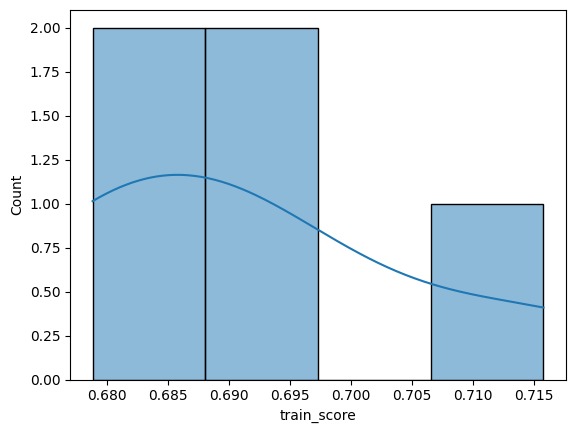

In [35]:
sns.histplot(data=df_result_cv, x="train_score", kde=True)

<Axes: xlabel='test_score', ylabel='Count'>

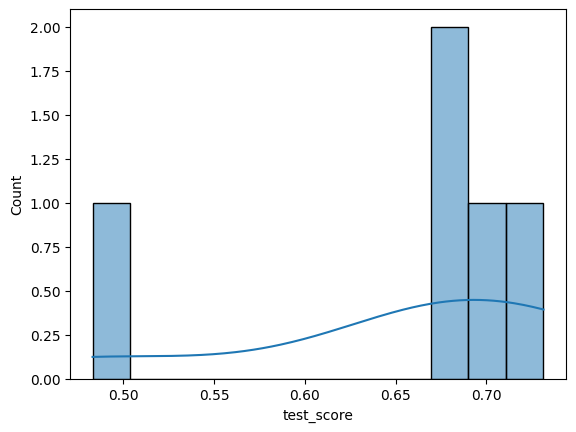

In [36]:
sns.histplot(data=df_result_cv, x="test_score", kde=True)

In [37]:
# Tudo em uma unica funcao
def plot_cv(estimator, X, y, n_splits, scoring):

    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(
        estimator=estimator, X=X, y=y, scoring=scoring, cv=kf5, return_train_score=True
    )

    df_result_cv = pd.DataFrame(result_cv)

    display(df_result_cv[["train_score", "test_score"]])

    print("\n Distribuição de métricas de treino")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    plt.show()
    print("\n Distribuição de métricas de teste")
    sns.histplot(data=df_result_cv, x="test_score", kde=True)
    plt.show()

    print("\n As duas juntas.")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    sns.histplot(data=df_result_cv, x="test_score", kde=True, color="orange")
    plt.show()

    df_result_cv.describe()


,train_score,test_score
0,0.686349,0.772522
1,0.687954,0.670384
2,0.689834,0.706691
3,0.688965,0.733674
4,0.696128,-0.261985
5,0.690125,0.688926
6,0.689593,0.680486
7,0.686663,0.807201
8,0.693335,0.595872
9,0.693286,0.606092



 Distribuição de métricas de treino


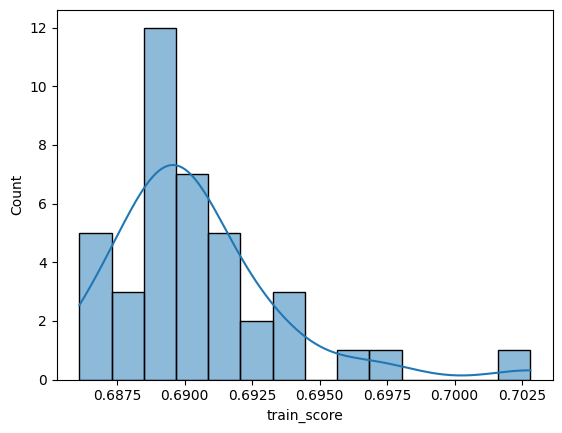


 Distribuição de métricas de teste


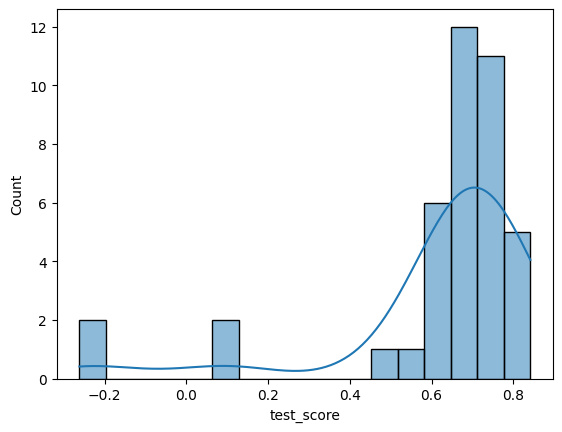


 As duas juntas.


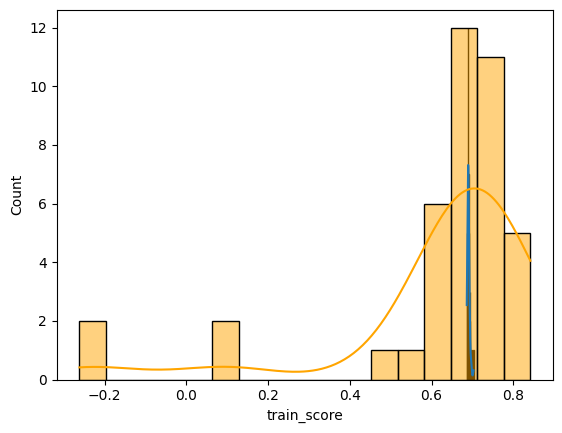

In [38]:
lr = LinearRegression()
plot_cv(lr, X, y, n_splits=40, scoring="r2")

In [39]:
df_result_cv[["train_score", "test_score"]].describe()

,train_score,test_score
count,5.000000,5.000000
mean,0.691812,0.652527
std,0.014846,0.097290
min,0.678843,0.483071
25%,0.680606,0.671902
50%,0.689451,0.685959
75%,0.694352,0.690241
max,0.715807,0.731462


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=42)

lr=LinearRegression()
lr.fit(Xtr, ytr)

y_pred_train = lr.predict(Xtr)
print("\nMétrica de treino:")
print(r2_score(ytr, y_pred_train))

y_pred_teste = lr.predict(Xts)

print("\n Métrica de teste:")
print(r2_score(yts,y_pred_teste))


Métrica de treino:
0.6830011150416557

 Métrica de teste:
0.6683978563525534


In [41]:
# Nomes das métricas
import sklearn.metrics

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [42]:
n_splits = 5
estimator = LinearRegression()
scoring = ("r2", "neg_mean_absolute_error", "neg_mean_squared_error")
kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)
result_cv = cross_validate(
    estimator=estimator, X=X, y=y, cv=kf5, scoring=scoring, return_train_score=True
)

df_result_cv = pd.DataFrame(result_cv)
df_result_cv = df_result_cv.abs()
df_result_cv

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.006675,0.002310,0.685959,0.678843,32151.557778,29975.465286,2.814759e+09,2.057216e+09
1,0.002677,0.002072,0.671902,0.694352,34190.917137,29930.909389,2.913614e+09,1.973727e+09
2,0.005091,0.002869,0.731462,0.680606,28797.012747,31713.965323,1.662119e+09,2.277051e+09
3,0.005560,0.002756,0.483071,0.715807,31674.639095,31684.605563,2.496029e+09,2.116632e+09
4,0.004834,0.002275,0.690241,0.689451,30009.839896,31544.759665,1.736622e+09,2.261649e+09


,train_r2,test_r2
count,5.000000,5.000000
mean,0.691812,0.652527
std,0.014846,0.097290
min,0.678843,0.483071
25%,0.680606,0.671902
50%,0.689451,0.685959
75%,0.694352,0.690241
max,0.715807,0.731462



 Distribuição de métricas _r2 de treino


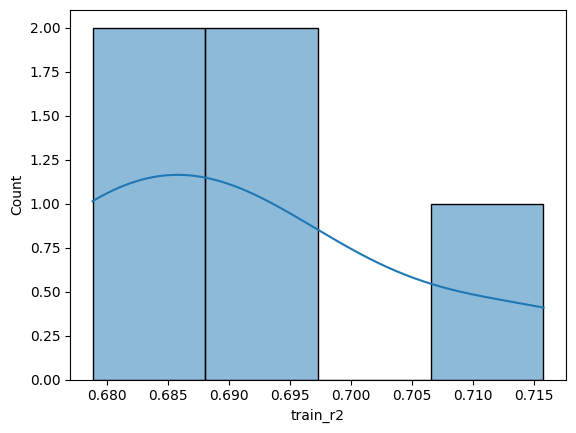


 Distribuição de métricas _r2 de teste


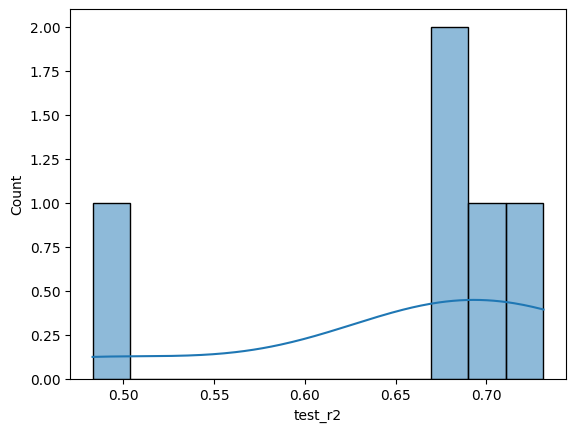

################################################################################


,train_neg_mean_absolute_error,test_neg_mean_absolute_error
count,5.000000,5.000000
mean,30969.941045,31364.793331
std,930.497550,2069.503225
min,29930.909389,28797.012747
25%,29975.465286,30009.839896
50%,31544.759665,31674.639095
75%,31684.605563,32151.557778
max,31713.965323,34190.917137



 Distribuição de métricas _neg_mean_absolute_error de treino


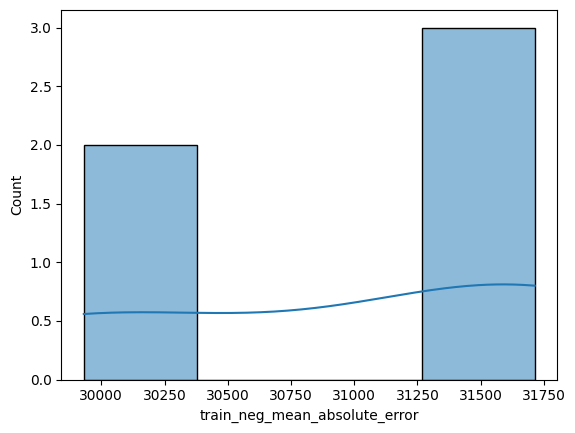


 Distribuição de métricas _neg_mean_absolute_error de teste


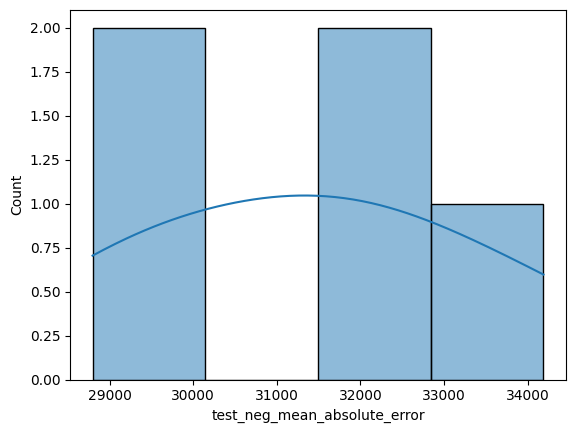

################################################################################


,train_neg_mean_squared_error,test_neg_mean_squared_error
count,5.000000e+00,5.000000e+00
mean,2.137255e+09,2.324629e+09
std,1.309483e+08,5.918575e+08
min,1.973727e+09,1.662119e+09
25%,2.057216e+09,1.736622e+09
50%,2.116632e+09,2.496029e+09
75%,2.261649e+09,2.814759e+09
max,2.277051e+09,2.913614e+09



 Distribuição de métricas _neg_mean_squared_error de treino


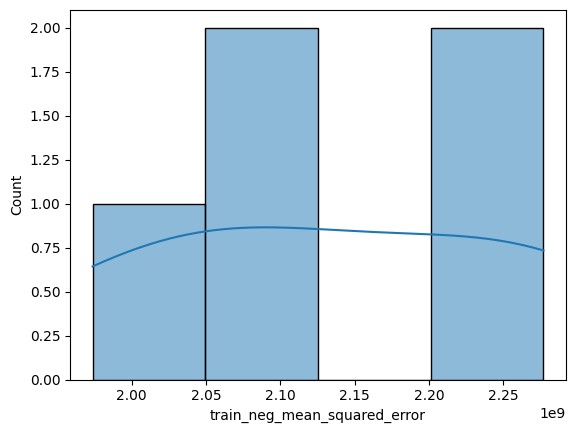


 Distribuição de métricas _neg_mean_squared_error de teste


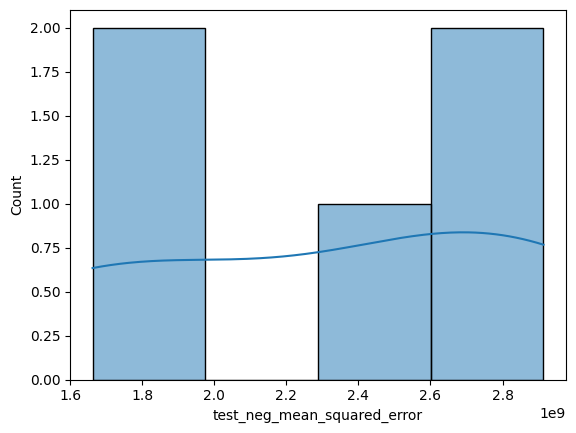

################################################################################


In [43]:
colunas_metricas = df_result_cv.columns.to_list()[2:]

for i in range(0,len(colunas_metricas),2):
    display(df_result_cv[[colunas_metricas[i+1], colunas_metricas[i]]].describe())

    print(f'\n Distribuição de métricas{colunas_metricas[i+1].replace("train", " ")} de treino')
    sns.histplot(data=df_result_cv, x= colunas_metricas[i+1], kde=True)
    plt.show()

    print(f'\n Distribuição de métricas{colunas_metricas[i].replace("test", " ")} de teste')
    sns.histplot(data=df_result_cv, x= colunas_metricas[i], kde=True)
    plt.show()
    print("#"*80)

_______________

In [44]:
def plot_cv_varias_metricas(estimator, X, y, n_splits, scoring):
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    result_cv = cross_validate(estimator=estimator, X=X, y=y,cv=kf5, scoring=scoring, return_train_score=True)

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()

    colunas_metricas = df_result_cv.columns.to_list()[2:]

    for i in range(0, len(colunas_metricas), 2):
        display(df_result_cv[[colunas_metricas[i+1], colunas_metricas[i]]].describe())

        print(f'\nDistribuição da métrica{colunas_metricas[i+1].replace("train"," ")} de treino')
        sns.histplot(data=df_result_cv, x = colunas_metricas[i+1], kde=True)
        plt.show()

        print(f'\nDistribuição da métrica{colunas_metricas[i].replace("test"," ")} de teste')
        sns.histplot(data=df_result_cv, x = colunas_metricas[i], kde=True)
        plt.show()

        print("\nAs duas juntas:")
        sns.histplot(data=df_result_cv, x = colunas_metricas[i+1], kde=True)
        sns.histplot(data=df_result_cv, x = colunas_metricas[i], kde=True, color="orange", label="teste")
        plt.legend()
        plt.show()

        print("#"*80)




,train_neg_mean_absolute_error,test_neg_mean_absolute_error
count,30.000000,30.000000
mean,30978.611671,31327.275664
std,219.854339,4588.458129
min,30427.177272,23217.846646
25%,30870.284487,28761.690673
50%,31013.721809,29706.960603
75%,31116.166274,34532.409410
max,31284.501893,40926.035032



Distribuição da métrica _neg_mean_absolute_error de treino


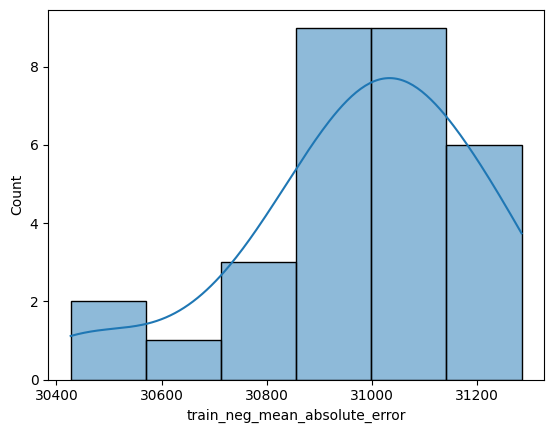


Distribuição da métrica _neg_mean_absolute_error de teste


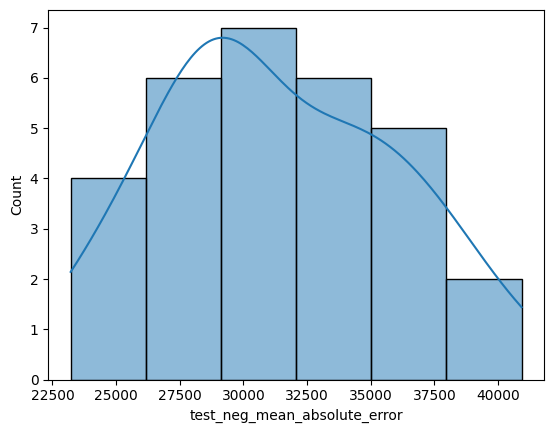


As duas juntas:


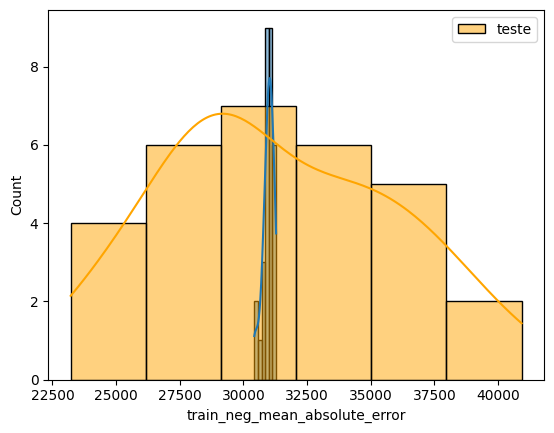

################################################################################


,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
count,30.000000,30.000000
mean,46375.937247,46285.770062
std,441.978558,13063.314490
min,45196.135337,29775.409584
25%,46166.840319,37892.996301
50%,46549.246741,41920.004203
75%,46664.386819,52932.657873
max,46865.890427,78030.560419



Distribuição da métrica _neg_root_mean_squared_error de treino


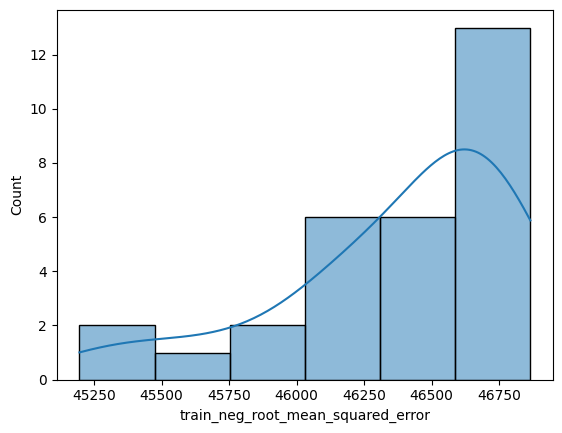


Distribuição da métrica _neg_root_mean_squared_error de teste


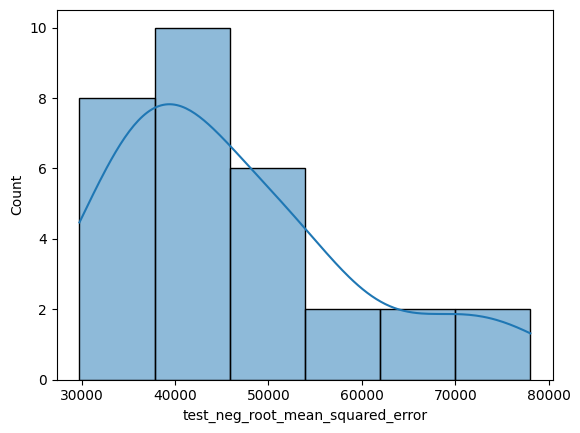


As duas juntas:


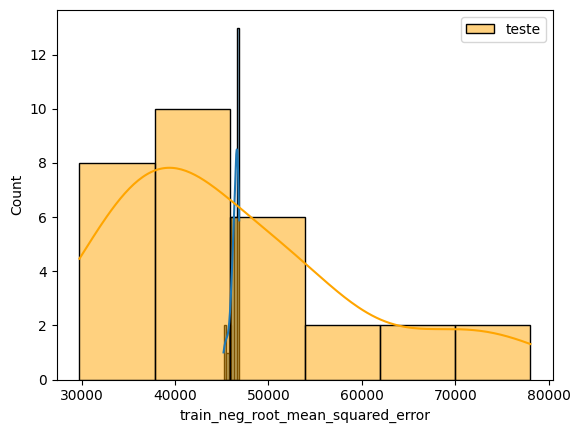

################################################################################


,train_r2,test_r2
count,30.000000,30.000000
mean,0.690413,0.653643
std,0.003749,0.146721
min,0.683363,0.209650
25%,0.688813,0.633031
50%,0.689790,0.693124
75%,0.692124,0.722763
max,0.702661,0.842295



Distribuição da métrica _r2 de treino


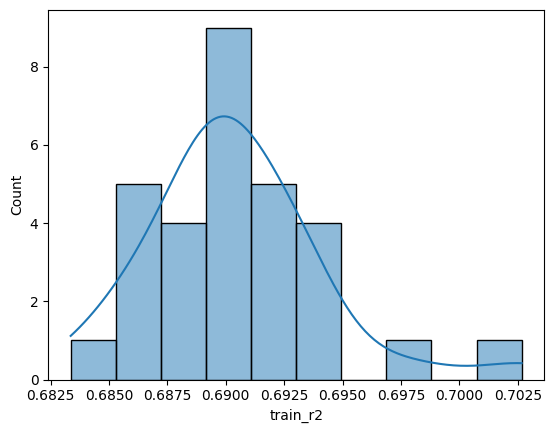


Distribuição da métrica _r2 de teste


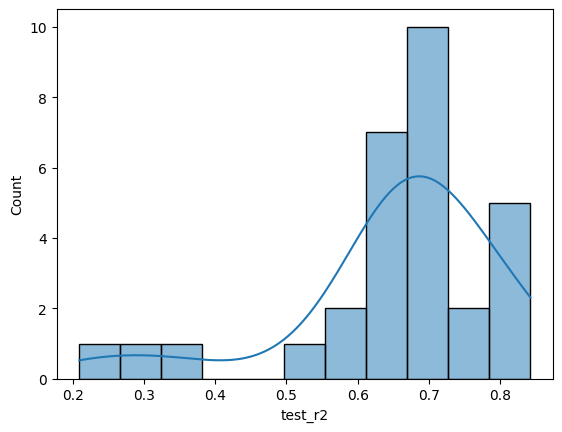


As duas juntas:


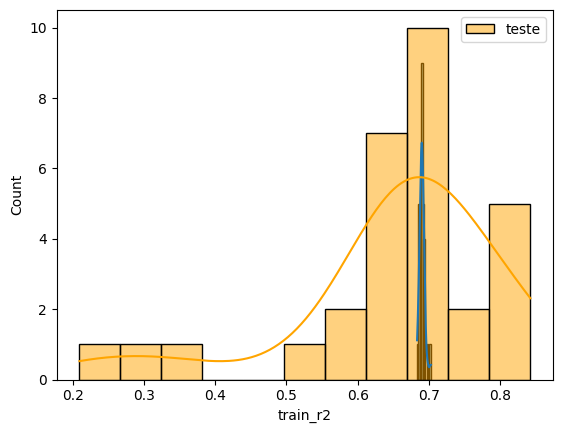

################################################################################


In [45]:
lr=LinearRegression()
scoring = ("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2")
plot_cv_varias_metricas(lr, X, y, 30, scoring=scoring)

In [46]:
X = house_prices.iloc[:, 1:2].values
y = house_prices.iloc[:, 2].values

In [47]:
from sklearn.preprocessing import PolynomialFeatures

lin = LinearRegression()

lin.fit(X, y)

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

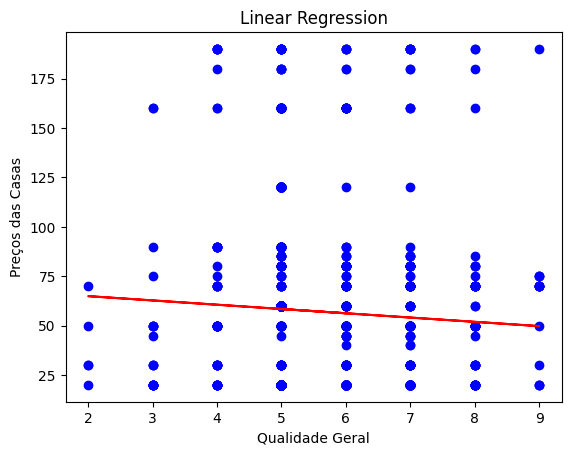

In [48]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Qualidade Geral')
plt.ylabel('Preços das Casas')

plt.show()

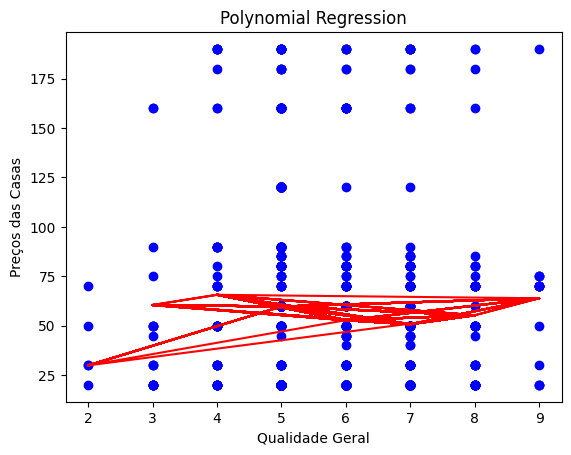

In [49]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Qualidade Geral')
plt.ylabel('Preços das Casas')

plt.show()

- 2 - Aplique o logit com CV à base breast_cancer

In [50]:
breast_cancer = pd.read_csv("./course_betech_machine_learning_I_activities/breast_cancer.csv")

In [51]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [55]:
breast_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [57]:
breast_cancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [58]:
X = breast_cancer.drop(["id", "diagnosis"], axis=1)

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
breast_cancer["diagnosis"]=le.fit_transform(breast_cancer["diagnosis"].values)

In [60]:
y=breast_cancer["diagnosis"]

In [61]:
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,train_score,test_score
0,0.994548,0.997059
1,0.995184,0.996278
2,0.994987,0.998649
3,0.994888,1.000000
4,0.995607,0.984330
5,0.996956,0.948750
6,0.994904,0.997059
7,0.994607,0.998759
8,0.994975,0.995062
9,0.996211,0.981508



 Distribuição de métricas de treino


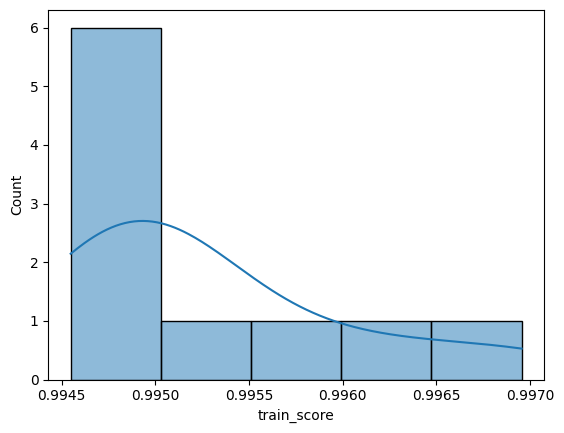


 Distribuição de métricas de teste


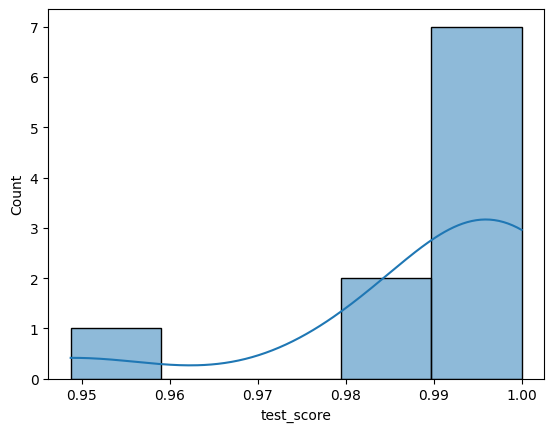


 As duas juntas.


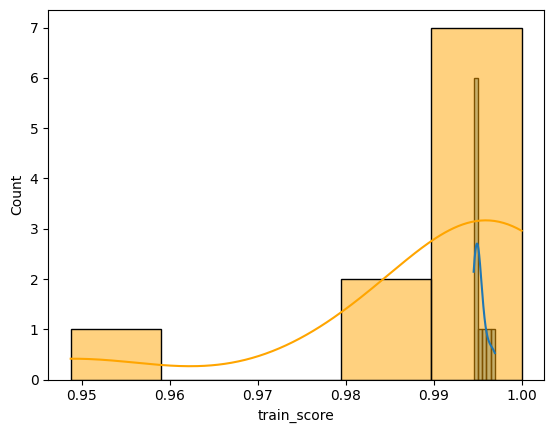

In [62]:
reglog=  LogisticRegression(penalty='l1', C=1.2, solver='liblinear')
plot_cv(reglog, X, y, n_splits=10, scoring='roc_auc')